In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings("ignore")

In [16]:
df=pd.read_csv("D:/Documents/Datasets/HR-DT.csv")
df.head()

,Position of the employee,no of Years of Experience of employee,monthly income of employee
0,Business Analyst,1.1,39343
1,Junior Consultant,1.3,46205
2,Senior Consultant,1.5,37731
3,Manager,2.0,43525
4,Country Manager,2.2,39891


In [17]:
df.shape

(196, 3)

rows=196 cols=3

In [18]:
df.columns

Index(['Position of the employee', 'no of Years of Experience of employee',
       ' monthly income of employee'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Position of the employee               196 non-null    object 
 1   no of Years of Experience of employee  196 non-null    float64
 2    monthly income of employee            196 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.7+ KB


In [20]:
df.isnull().sum()

Position of the employee                 0
no of Years of Experience of employee    0
 monthly income of employee              0
dtype: int64

In [21]:
df["Position of the employee"].value_counts()

Position of the employee
Partner              28
Senior Partner       25
C-level              24
Region Manager       23
CEO                  23
Country Manager      18
Manager              17
Senior Consultant    16
Junior Consultant    14
Business Analyst      8
Name: count, dtype: int64

In [22]:
df["no of Years of Experience of employee"].value_counts()

no of Years of Experience of employee
4.0     14
3.2     14
1.3      7
4.5      7
4.1      7
3.9      7
3.7      7
1.1      7
3.0      7
2.9      7
2.2      7
2.0      7
1.5      7
8.2      6
10.5     6
10.3     6
9.6      6
9.5      6
9.0      6
8.7      6
5.1      6
7.9      6
7.1      6
6.8      6
6.0      6
5.9      6
5.3      6
4.9      6
1.0      1
Name: count, dtype: int64

In [23]:
df[" monthly income of employee"].value_counts()

 monthly income of employee
39343     7
57189     7
46205     7
61111     7
57081     7
56957     7
55794     7
63218     7
67938     7
64445     7
60150     7
56642     7
39891     7
43525     7
37731     7
54445     7
113812    6
122391    6
112635    6
116969    6
105582    6
109431    6
93940     6
101302    6
98273     6
91738     6
81363     6
83088     6
66029     6
121872    6
Name: count, dtype: int64

In [24]:
for i in df[" monthly income of employee"]:
    if i<70000:
        df[" monthly income of employee"]=np.where(df[" monthly income of employee"]==i,0,df[" monthly income of employee"])
    else:
        df[" monthly income of employee"]=np.where(df[" monthly income of employee"]==i,1,df[" monthly income of employee"])

In [25]:
df.head()

,Position of the employee,no of Years of Experience of employee,monthly income of employee
0,Business Analyst,1.1,0
1,Junior Consultant,1.3,0
2,Senior Consultant,1.5,0
3,Manager,2.0,0
4,Country Manager,2.2,0


In [26]:
df[" monthly income of employee"].value_counts()

 monthly income of employee
0    118
1     78
Name: count, dtype: int64

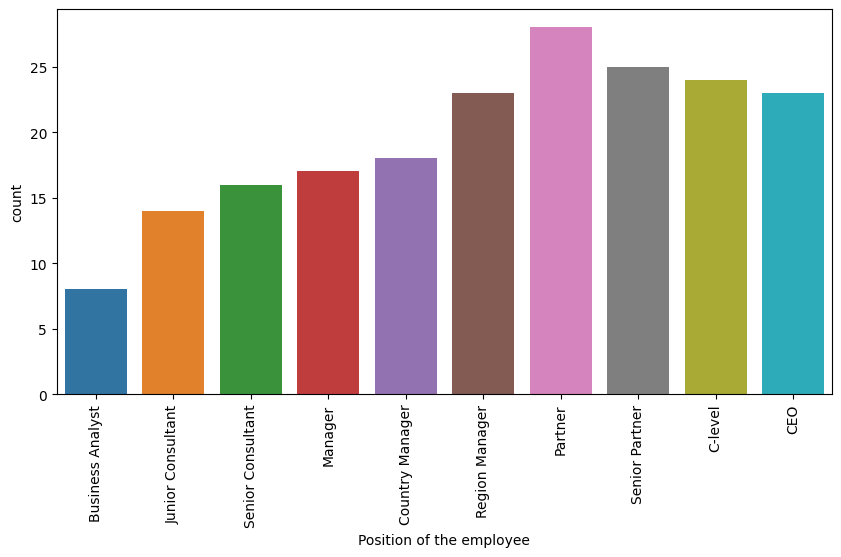

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(x=df["Position of the employee"])
plt.xticks(rotation=90)
plt.show()

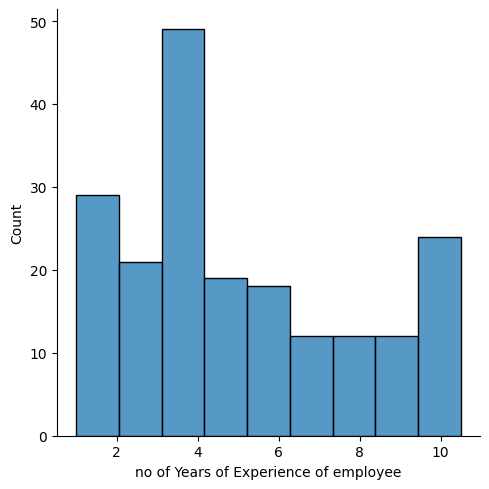

In [28]:
sns.displot(x=df["no of Years of Experience of employee"])
plt.show()

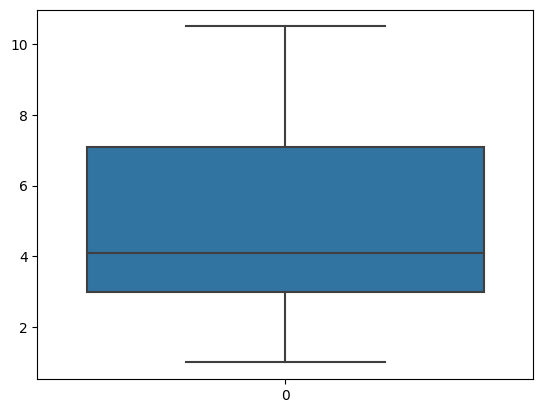

In [29]:
sns.boxplot(df["no of Years of Experience of employee"])
plt.show()

In [30]:
le=LabelEncoder()

In [31]:
df["Position of the employee"]=le.fit_transform(df["Position of the employee"])

In [32]:
df.head()

,Position of the employee,no of Years of Experience of employee,monthly income of employee
0,0,1.1,0
1,4,1.3,0
2,8,1.5,0
3,5,2.0,0
4,3,2.2,0


In [33]:
inputs=df.drop([" monthly income of employee"],axis=1)
target=df[" monthly income of employee"]

In [34]:
inputs.head()

,Position of the employee,no of Years of Experience of employee
0,0,1.1
1,4,1.3
2,8,1.5
3,5,2.0
4,3,2.2


In [35]:
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.3)

In [36]:
model=DecisionTreeClassifier()

In [37]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [39]:
acc=accuracy_score(y_test,y_pred)
acc

1.0

In [40]:
model.predict([[2,2.2]])

array([0], dtype=int64)